#Exercise 3.1: Convergence of sequences:#

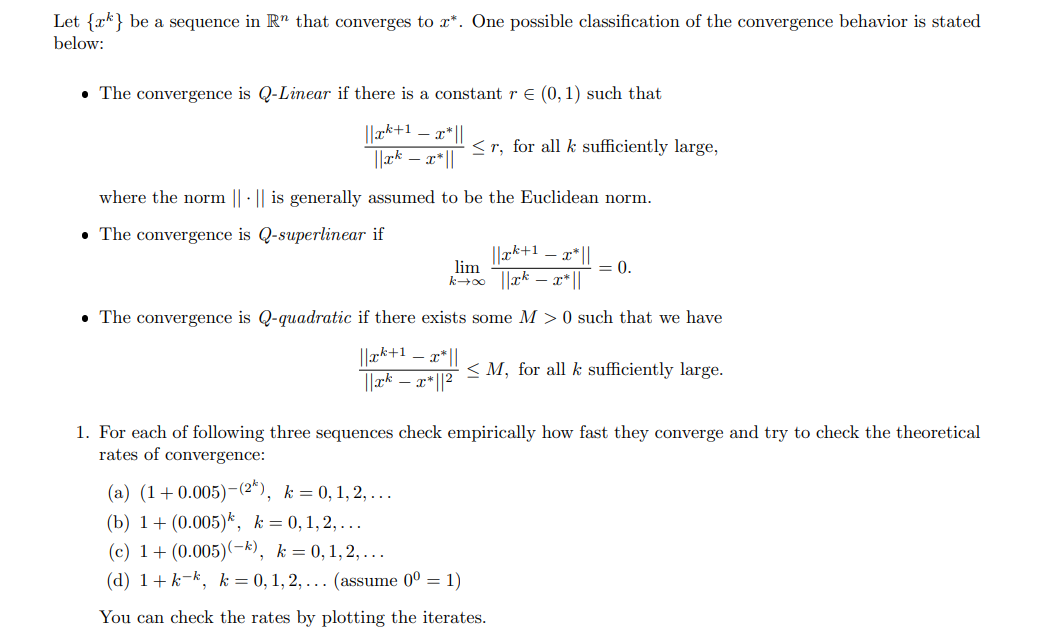

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt

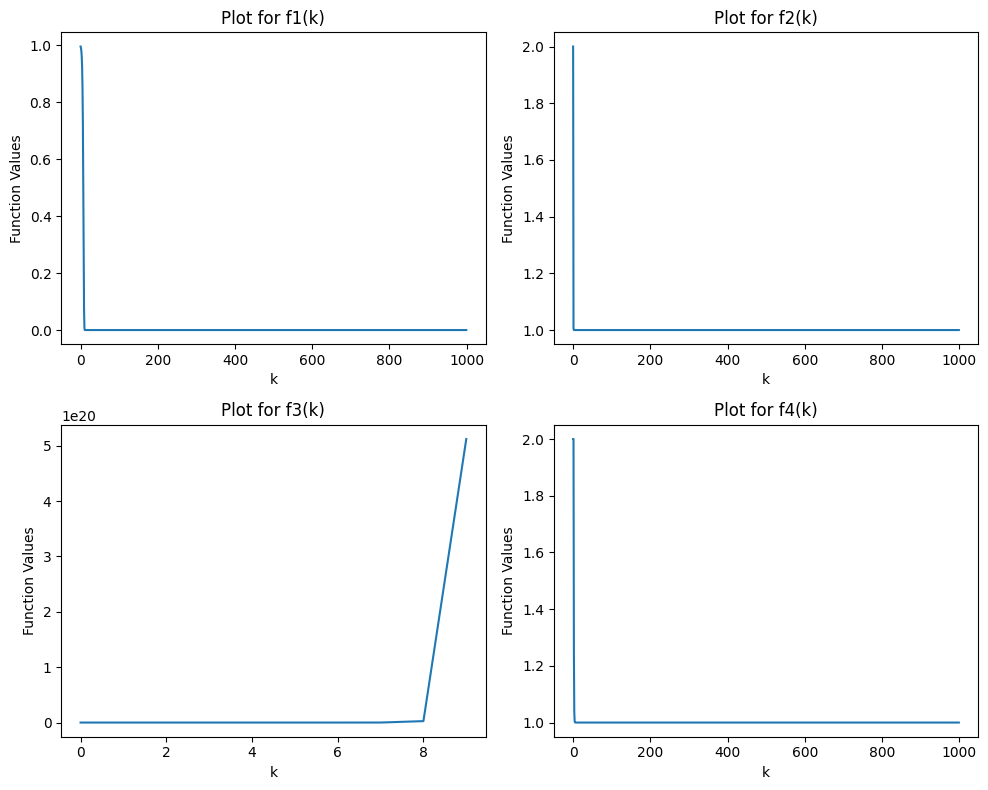

In [ ]:
import matplotlib.pyplot as plt

def f1(k):
    return (1 + 0.005) ** (-(2 ** k))

def f2(k):
    return 1 + (0.005) ** k

def f3(k):
    return 1 + (0.005) ** (-k)

def f4(k):
    return 1 + (k) ** (-k)

F1 = []
F2 = []
F3 = []
F4 = []

for i in range(1000):
    F1.append(f1(i))
    F2.append(f2(i))
    F4.append(f4(i))

for i in range(10):
    F3.append(f3(i))

plt.figure(figsize=(10, 8))

# Plot for f1(k)
plt.subplot(2, 2, 1)
plt.plot(list(range(1000)), F1)
plt.title('Plot for f1(k)')
plt.xlabel('k')
plt.ylabel('Function Values')

# Plot for f2(k)
plt.subplot(2, 2, 2)
plt.plot(list(range(1000)), F2)
plt.title('Plot for f2(k)')
plt.xlabel('k')
plt.ylabel('Function Values')

# Plot for f3(k)
plt.subplot(2, 2, 3)
plt.plot(list(range(10)), F3)
plt.title('Plot for f3(k)')
plt.xlabel('k')
plt.ylabel('Function Values')

# Plot for f4(k)
plt.subplot(2, 2, 4)
plt.plot(list(range(1000)), F4)
plt.title('Plot for f4(k)')
plt.xlabel('k')
plt.ylabel('Function Values')

plt.tight_layout()
plt.show()


#Exercise 3.2: Data Preparation Exercise (PREP)#

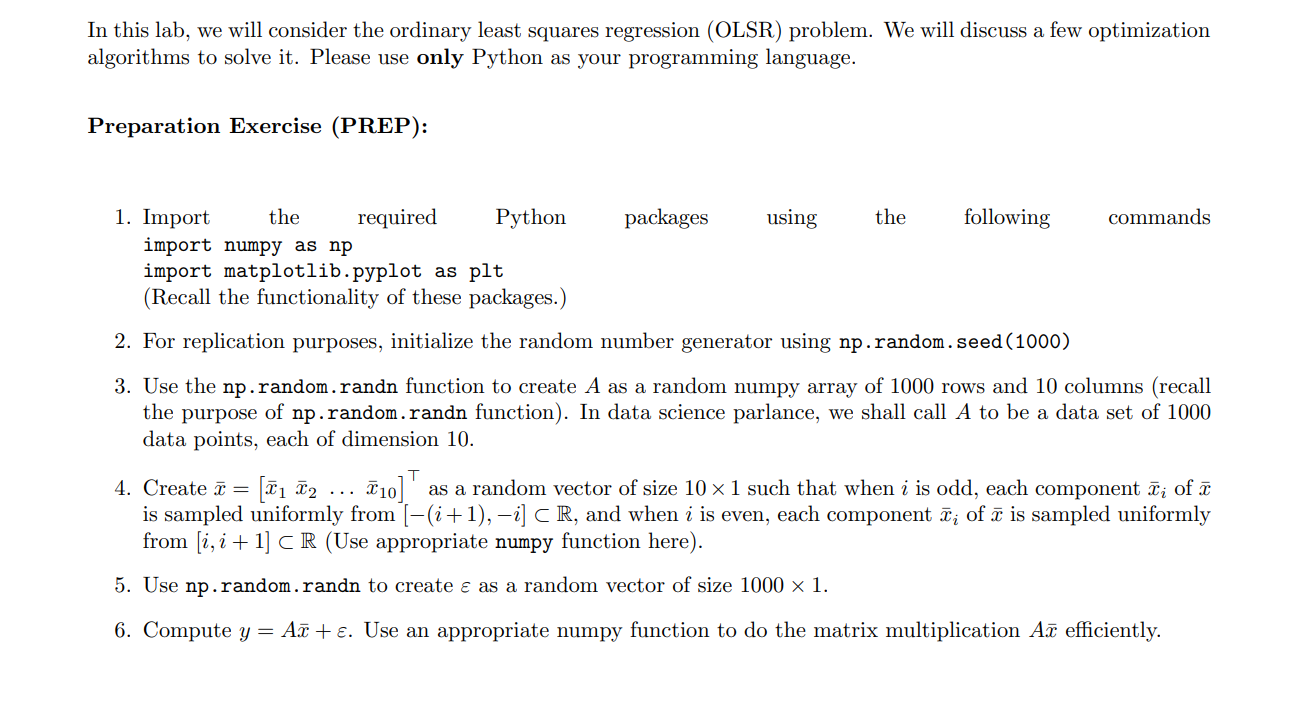

In [ ]:
import math
from timeit import default_timer as timer
np.random.seed(1000)

In [ ]:
def create_data():
    np.random.seed(1000)
    array_A = np.random.randn(1000, 10)
    x_bar_new = np.zeros(10)
    for index in range(10):
      if (index+1)%2 == 0:
        x_bar_new[index] = np.random.uniform(low = index+1, high = index+2)
      else:
        x_bar_new[index] = np.random.uniform(low = -(index+2), high = -(index+1) )
      x_bar_new = np.array(x_bar_new)
      x_bar_new = x_bar_new.reshape(10,1)
    array_epsilon = np.random.randn(1000, 1)
    output_y = np.add(np.dot(array_A, x_bar_new), array_epsilon)
    return array_A, x_bar_new, output_y

def evalf(array_A, x_variable, y_variable):
    temp_variable = np.subtract(np.dot(array_A, x_variable), y_variable)
    fval_result = 0.5 * np.linalg.norm(temp_variable, 2) ** 2
    return fval_result



In [ ]:
array_A, _, output_y = create_data()
x_variable = []
for index in range(10):
  x_variable.append([1])
x_variable = np.array(x_variable)

In [ ]:
def evalg(array_A, x_variable, y_variable):
    temp_variable = np.dot(array_A, x_variable) - y_variable
    grad_result = np.dot(array_A.T, temp_variable)
    return grad_result

def evalh(A, x):
    hess = np.matmul(A.T, A)
    return hess

def compute_D_k_newton(A, x):
    d = np.linalg.inv(evalh(A, x))
    return d
def compute_steplength_backtracking_scaled_direction(A, x, y, gradf, D_k, alpha_start, rho, gamma):
    alpha = alpha_start
    p_k = -np.dot(D_k, gradf)
    while evalf(A, np.add(x, np.multiply(alpha, p_k)), y) > np.multiply(gamma * alpha, np.dot(gradf.T, p_k)) + evalf(A, x, y):
        alpha = rho * alpha
    return alpha

In [ ]:
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1

In [ ]:
def find_minimizer_Newtonmethod(start_x, array_A, output_y, tol, line_search_type, *args):
    x_variable = start_x
    grad_f_x = evalg(array_A, x_variable, output_y)

    x_array = [x_variable]
    f_array = [evalf(array_A, x_variable, output_y)]
    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
            raise ValueError(err_msg)
        elif len(args) < 3:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0

    while (np.linalg.norm(grad_f_x) > tol):
        D_k = compute_D_k_newton(array_A, x_variable)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking_scaled_direction(array_A, x_variable, output_y, grad_f_x, D_k, alpha_start, rho, gamma)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 1.0
        else:
            raise ValueError('Line search type unknown. Please check!')

        x_variable = np.subtract(x_variable, np.multiply(step_length, np.dot(D_k, grad_f_x)))
        k += 1
        grad_f_x = evalg(array_A, x_variable, output_y)
        x_array.append(x_variable)
        f_array.append(evalf(array_A, x_variable, output_y))

    return x_array, f_array, k

In [ ]:
def find_minimizer_BFGS(start_x, array_A, output_y, tol, line_search_type, *args):
    x_variable = start_x
    g_x = evalg(array_A, x_variable, output_y)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
            raise ValueError(err_msg)
        elif len(args) < 3:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0
    B = np.identity(10)
    x_array = [x_variable]
    f_array = [evalf(array_A, x_variable, output_y)]

    while (np.linalg.norm(g_x) > tol):
        p = -np.dot(B, g_x)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            d_k = B
            step_length = compute_steplength_backtracking_scaled_direction(array_A, x_variable, output_y, g_x, d_k, alpha_start, rho, gamma)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 1.0
        else:
            raise ValueError('Line search type unknown. Please check!')

        x_next = np.add(x_variable, np.multiply(step_length, p))
        s_k = x_next - x_variable
        y_k = evalg(array_A, x_next, output_y) - g_x
        mu_k = 1.0 / np.dot(y_k.T, s_k)
        temp = (np.identity(10) - np.multiply(mu_k, np.outer(y_k, s_k.T)))
        B = np.dot(temp.T, np.dot(B, temp)) + np.multiply(mu_k, np.outer(s_k, s_k.T))
        k += 1
        x_variable = x_next
        g_x = evalg(array_A, x_variable, output_y)

        x_array.append(x_variable)
        f_array.append(evalf(array_A, x_variable, output_y))

    return x_array, f_array, k


In [ ]:
array_A, x_bar, output_y = create_data()
my_start_x_variable = []
for index in range(10):
    my_start_x_variable.append([0])
my_start_x_variable = np.array(my_start_x_variable)


Results obtained from Newton method (with backtracking)
Minimizer: [[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821112]
 [-9.22221199]
 [10.05669293]],
Final Objective function value: 505.647329524551,
Iterations taken to terminate: 5


Actual x_bar: [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

Time taken to find minimizer by Newton's method: 0.002339418000246951



<ipython-input-11-1f63cc025704>:19: RuntimeWarning: divide by zero encountered in log
  plot_x.append(np.log(np.linalg.norm(x_array_newton[i] - x_opt)))


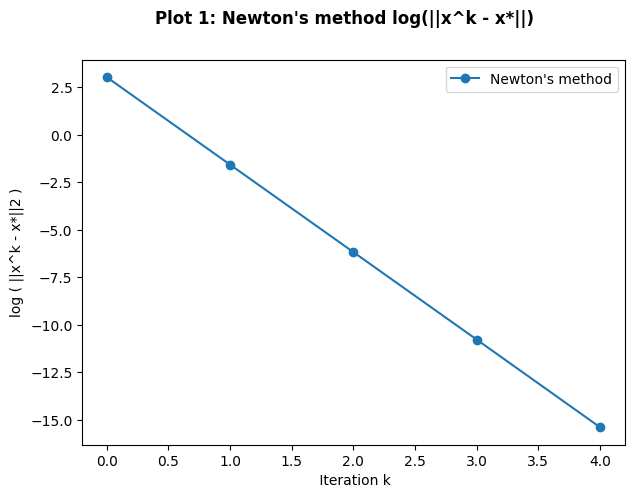

In [ ]:
my_tol_value = 1e-5
alpha_start_value = 0.99
rho_value = 0.5
gamma_value = 0.5
start_time = timer()
x_array_newton, f_array_newton, iters_opt_newton = find_minimizer_Newtonmethod(my_start_x_variable, array_A, output_y, my_tol_value, BACKTRACKING_LINE_SEARCH, alpha_start_value, rho_value, gamma_value)
end_time = timer()
times_newton = end_time - start_time
print(f"\nResults obtained from Newton method (with backtracking)\nMinimizer: {x_array_newton[-1]},\nFinal Objective function value: {f_array_newton[-1]},\nIterations taken to terminate: {iters_opt_newton}\n")
print('')
print(f'Actual x_bar: {x_bar}\n')
print(f"Time taken to find minimizer by Newton's method: {times_newton}")
print('')


x_opt = x_array_newton[-1]
plot_x = []
for i in range(len(x_array_newton)):
    plot_x.append(np.log(np.linalg.norm(x_array_newton[i] - x_opt)))

fig, ax = plt.subplots(1,1, figsize = (7,5))
fig.suptitle("Plot 1: Newton's method log(||x^k - x*||)", fontweight= 'bold')
ax.plot(np.arange(len(x_array_newton)), plot_x, 'o-', label = "Newton's method")
ax.set_xlabel(" Iteration k")
ax.set_ylabel("log ( ||x^k - x*||2 )")
ax.legend()


<ipython-input-12-515a4fdae2cd>:4: RuntimeWarning: divide by zero encountered in log
  plot_fx.append(np.log(np.abs(f_array_newton[i] - f_opt_value)))


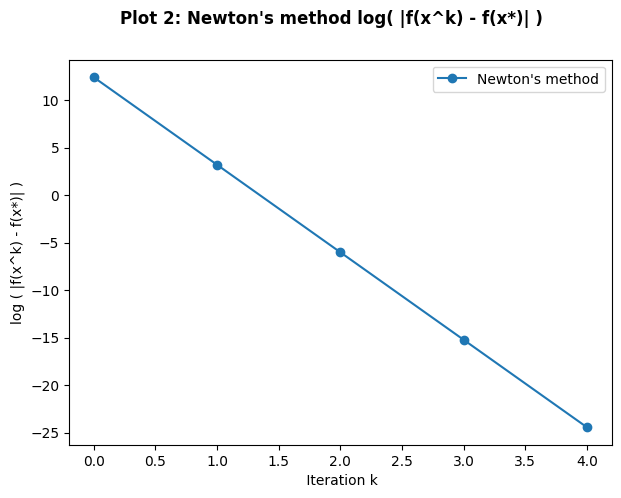

In [ ]:
f_opt_value = f_array_newton[-1]
plot_fx = []
for i in range(len(f_array_newton)):
    plot_fx.append(np.log(np.abs(f_array_newton[i] - f_opt_value)))

fig2, ax = plt.subplots(1,1, figsize = (7,5))
fig2.suptitle("Plot 2: Newton's method log( |f(x^k) - f(x*)| )", fontweight= 'bold')
ax.plot(np.arange(len(f_array_newton)), plot_fx, 'o-', label = "Newton's method")
ax.set_xlabel(" Iteration k")
ax.set_ylabel("log ( |f(x^k) - f(x*)| )")
ax.legend()


Newton's Method with backtracking line search

α=0.99,ρ=0.5,γ=0.5

After our algorithm's completion, let's denote the final optimal solution as x∗:

The values of x∗ are as follows:
x∗ = [[-1.04982253],
[ 2.95189743],
[-3.34298192],
[ 4.60956007],
[-5.71176195],
[ 6.89877618],
[-7.62879358],
[ 8.16821112],
[-9.22221199],
[10.05669293]]

Moreover, we also have x¯, which is defined as:
x¯ = [[-1.06258705],
[ 2.94307072],
[-3.34150552],
[ 4.58252615],
[-5.75947573],
[ 6.93512469],
[-7.61893094],
[ 8.16818187],
[-9.2179964 ],
[10.00022174]]

Notably, we can observe that:

Both x∗ and x¯ showcase nearly identical values, falling within the specified tolerance precision.
The corresponding function values for x∗ and x¯, denoted as f(x∗) and f(x¯), respectively, are approximately equal, thus confirming consistency with the specified tolerance precision.
Furthermore, the convergence rate remains steady, demonstrating quadratic convergence for both the iterates and the objective function values. Initially, we notice rapid convergence, succeeded by a phase of gradual convergence.


Results obtained from BFGS method (with backtracking)
Minimizer: [[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821111]
 [-9.22221199]
 [10.05669293]],
Final Objective function value: 505.64732952455125,
Iterations taken to terminate: 18


Actual x_bar: [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

Time taken to find minimizer by BFGS method: 0.021259097999973164



<ipython-input-13-c95ffbfa6552>:22: RuntimeWarning: divide by zero encountered in log
  plot_x_bfgs.append(np.log(np.linalg.norm(x_array_bfgs[i] - x_opt)))


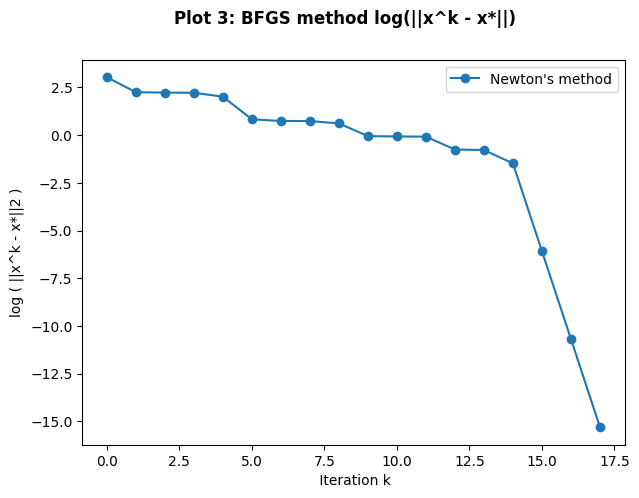

In [ ]:
my_start_x_variable = []
for i in range(10):
    my_start_x_variable.append([0])
my_start_x_variable = np.array(my_start_x_variable)
my_tol_value = 1e-5
alpha_start_value = 0.99
rho_value = 0.5
gamma_value = 0.5
start_time = timer()
x_array_bfgs, f_array_bfgs, iters_opt_bfgs = find_minimizer_BFGS(my_start_x_variable, array_A, output_y, my_tol_value, BACKTRACKING_LINE_SEARCH, alpha_start_value, rho_value, gamma_value)
end_time = timer()
time_bfgs = end_time - start_time
print(f"\nResults obtained from BFGS method (with backtracking)\nMinimizer: {x_array_bfgs[-1]},\nFinal Objective function value: {f_array_bfgs[-1]},\nIterations taken to terminate: {iters_opt_bfgs}\n")
print('')
print(f'Actual x_bar: {x_bar}\n')
print(f"Time taken to find minimizer by BFGS method: {time_bfgs}")
print('')

x_opt = x_array_bfgs[-1]
plot_x_bfgs = []
for i in range(len(x_array_bfgs)):
    plot_x_bfgs.append(np.log(np.linalg.norm(x_array_bfgs[i] - x_opt)))

fig, ax = plt.subplots(1,1, figsize=(7,5))
fig.suptitle("Plot 3: BFGS method log(||x^k - x*||)", fontweight='bold')
ax.plot(np.arange(len(x_array_bfgs)), plot_x_bfgs, 'o-', label="Newton's method")
ax.set_xlabel(" Iteration k")
ax.set_ylabel("log ( ||x^k - x*||2 )")
ax.legend()


<ipython-input-14-57cb7918be00>:4: RuntimeWarning: divide by zero encountered in log
  plot_fx_bfgs.append(np.log(np.abs(f_array_bfgs[i] - f_opt_bfgs_value)))


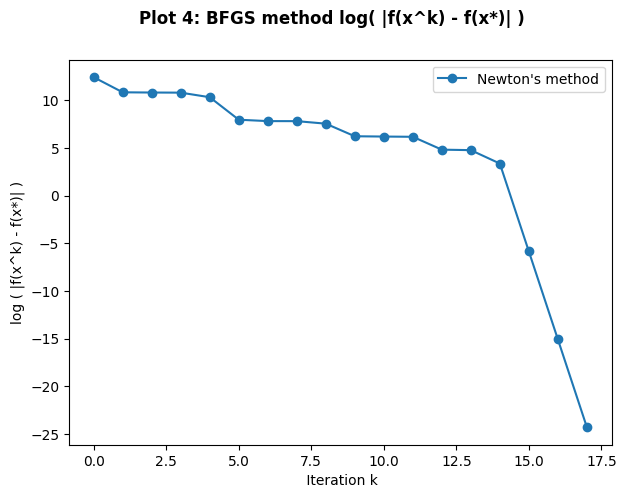

In [ ]:
f_opt_bfgs_value = f_array_bfgs[-1]
plot_fx_bfgs = []
for i in range(len(f_array_bfgs)):
    plot_fx_bfgs.append(np.log(np.abs(f_array_bfgs[i] - f_opt_bfgs_value)))

fig2, ax = plt.subplots(1, 1, figsize=(7, 5))
fig2.suptitle("Plot 4: BFGS method log( |f(x^k) - f(x*)| )", fontweight='bold')
ax.plot(np.arange(len(f_array_bfgs)), plot_fx_bfgs, 'o-', label="Newton's method")
ax.set_xlabel(" Iteration k")
ax.set_ylabel("log ( |f(x^k) - f(x*)| )")
ax.legend()


We denote the final optimal solution obtained by our algorithm as x∗.

The final optimal solution, represented by x∗, consists of the following values:
x∗ = [[-1.04982253],
[ 2.95189743],
[-3.34298192],
[ 4.60956007],
[-5.71176195],
[ 6.89877618],
[-7.62879358],
[ 8.16821111],
[-9.22221199],
[10.05669293]]

Similarly, we have x¯ with the following values:
x¯ = [[-1.06258705],
[ 2.94307072],
[-3.34150552],
[ 4.58252615],
[-5.75947573],
[ 6.93512469],
[-7.61893094],
[ 8.16818187],
[-9.2179964 ],
[10.00022174]]

Upon analysis, we observe the following:

Both x∗ and x¯ display nearly identical values, meeting the tolerance precision criteria.
Evaluating the objective function at these points yields:
f(x∗) = 505.64732952455125
f(x¯) = 505.64732952455125
Once again, both function values align closely with the tolerance precision standards.
The convergence behavior remains consistent:
The convergence rate is quadratic for both the iterates and the objective function values.
Initially, rapid convergence is observed, transitioning into a slower convergence phase over time.
Notably, slight perturbations are observed during the initial iterations, but these are swiftly resolved as the convergence progresses.


# ANS
Both Newton's method and the BFGS method demonstrated quadratic convergence, meaning that their convergence rates were proportional to the square of the distance to the optimal solution. However, Newton's method achieved convergence in fewer iterations compared to the BFGS method.

This discrepancy in iteration counts is anticipated because Newton's method directly computes the inverse of the Hessian matrix, while the BFGS method approximates the Hessian matrix using gradient information. Due to this approximation, the BFGS method may require more iterations to converge.

Initially, the BFGS method might exhibit slower convergence than Newton's method and may display some oscillations as it refines its approximation of the Hessian matrix. However, despite these initial differences, both methods ultimately converged to the same objective value and optimal solution, ensuring consistency in the final results.